<h1>Taller 2: Multiplicación de Matrices</h1>

In [1]:
import numpy as np
import matplotlib.pyplot as pl
import time
%matplotlib inline

In [2]:
class Counter:
    '''
    Class Counter
    Implements a step counter, which is used to compute the number of basic operations performed in
    a particular call to a function.
    '''
    def __init__(self):
        self.steps = 0

    def reset(self):
        self.steps = 0

    def count(self):
        self.steps += 1

    def print_steps(self):
        print "Number of steps =", self.steps

<h3>1. Multiplicacion <i>O(n^3)</i></h3>

In [3]:
def matrix_multi(mA, mB, acct):
    column = []
    if len(mA) != len(mB):
        acct.count()
        return column
    else:
        acct.count()
        for i in range(0, len(mA)):
            acct.count()
            low = []; acct.count()
            for j in range(0, len(mA[i])):
                acct.count()
                aux = 0; acct.count()
                for k in range(0, len(mB)):
                    acct.count()
                    aux += mA[i][k]*mB[k][j]; acct.count()
                low.append(aux)
            column.append(low)
    return column

Test:

In [4]:
acct = Counter()
A = [[2,0,1,5],[3,0,0,5],[5,1,1,2],[8,9,1,6]]
B = [[1,0,1,7],[1,2,1,7],[1,1,0,9],[5,7,4,0]]

C = matrix_multi(A, B, acct)

print('\n'.join([''.join(['{:4}'.format(item) for item in row]) for row in C]))

  28  36  22  23
  28  35  23  21
  17  17  14  51
  48  61  41 128


<h3>2. Divide y Conquista</h3>

Llenar la matriz.

In [5]:
def matData(A):
    num = 1
    for i in range(0,7):
        low = []
        for j in range(0,7):
            low.append(num)
            num = num+1
        A.append(low)

Dividir la matriz en cuatro partes.

In [6]:
def split(matrix, acct):
    a = matrix; acct.count()
    b = matrix; acct.count()
    c = matrix; acct.count()
    d = matrix; acct.count()
    
    while(len(a) > len(matrix)/2):
        acct.count()
        a = a[:len(a)/2]; acct.count()
        b = b[:len(b)/2]; acct.count()
        c = c[len(c)/2:]; acct.count()
        d = d[len(d)/2:]; acct.count()
        
    while(len(a[0]) > len(matrix[0])/2):
        acct.count()
        for i in range(len(a[0])/2):
            acct.count()
            a[i] = a[i][:len(a[i])/2]; acct.count()
            b[i] = b[i][len(b[i])/2:]; acct.count()
            c[i] = c[i][:len(c[i])/2]; acct.count()
            d[i] = d[i][len(d[i])/2:]; acct.count()
    return a,b,c,d

Cambiar matricez impar a par

In [7]:
def change_matrix(A, acct):
    for i in range(0,len(A)):
        acct.count()
        A[i].append(0)
        
    aux = []; acct.count()
    for i in range(0,len(A)+1):
        acct.count()
        aux.append(0)
    A.append(aux)

Dividir la matriz hasta que sea 2x2

In [8]:
def rec(A, B, acct):
    hasZero = False
    if(len(A)%2 != 0):
        acct.count()
        change_matrix(A, acct)
        change_matrix(B, acct)
        hasZero = True
    
    if(len(A)>2):
        acct.count()
        a11,a12,a21,a22 = split(A, acct); acct.count()
        b11,b12,b21,b22 = split(B, acct); acct.count()
        
        var1 = np.array(rec(a11, b11, acct)) + np.array(rec(a12, b21, acct)); acct.count()
        var2 = np.array(rec(a11, b12, acct)) + np.array(rec(a12, b22, acct)); acct.count()
        var3 = np.array(rec(a21, b11, acct)) + np.array(rec(a22, b21, acct)); acct.count()
        var4 = np.array(rec(a21, b12, acct)) + np.array(rec(a22, b22, acct)); acct.count()
        
        s_1 = np.concatenate((var1,var2), axis =1); acct.count()
        s_2 = np.concatenate((var3,var4), axis =1); acct.count()
        ans = np.concatenate((s_1,s_2), axis =0); acct.count()
        
        if(hasZero):
            acct.count()
            ans = np.delete(ans, len(ans)-1, 0)
            ans = np.delete(ans, len(ans), 1)
        
        return ans
            
    if(len(A)==2):
        acct.count()
        return mult(A, B, acct)

def mult(mA, mB, acct):
    column = []
    if len(mA) != len(mB):
        acct.count()
        return column
    else:
        acct.count()
        for i in range(0, len(mA)):
            acct.count()
            low = []; acct.count()
            for j in range(0, len(mA[i])):
                acct.count()
                aux = 0; acct.count()
                for k in range(0, len(mB)):
                    acct.count()
                    aux += mA[i][k]*mB[k][j]; acct.count()
                low.append(aux)
            column.append(low)
    return column

Test:

In [9]:
acct = Counter()
A = []
B = []
matData(A)
matData(B)

C = rec(A, B, acct)
print('\n'.join(['   '.join(['{:4}'.format(item) for item in row]) for row in C]))

 812    840    868    896    924    952    980
1890   1967   2044   2121   2198   2275   2352
2968   3094   3220   3346   3472   3598   3724
4046   4221   4396   4571   4746   4921   5096
5124   5348   5572   5796   6020   6244   6468
6202   6475   6748   7021   7294   7567   7840
7280   7602   7924   8246   8568   8890   9212


<h3>3. Algoritmo de Strassen</h3>

Tomado por: http://stackoverflow.com/questions/12867099/strassen-matrix-multiplication-close-but-still-with-bugs

In [10]:
def new_m(p, q, acct): # create a matrix filled with 0s
    matrix = [[0 for row in range(p)] for col in range(q)]; acct.count()
    return matrix

def add_m(a, b, acct):
    if type(a) == int:
        acct.count()
        d = a + b; acct.count()
    else:
        acct.count()
        d = []; acct.count()
        for i in range(len(a)):
            acct.count()
            c = []; acct.count()
            for j in range(len(a[0])):
                acct.count()
                c.append(a[i][j] + b[i][j]); acct.count()
            d.append(c)
    return d

def sub_m(a, b, acct):
    if type(a) == int:
        acct.count()
        d = a - b; acct.count()
    else:
        d = []; acct.count()
        for i in range(len(a)):
            acct.count()
            c = []; acct.count()
            for j in range(len(a[0])):
                acct.count()
                c.append(a[i][j] - b[i][j]); acct.count()
            d.append(c)
    return d

def strassen(a, b, q, acct):
    # base case: 1x1 matrix
    if q == 1:
        acct.count()
        d = [[0]]; acct.count()
        d[0][0] = a[0][0] * b[0][0]; acct.count()
        return d
    else:
        acct.count()
        #split matrices into quarters
        a11, a12, a21, a22 = split(a, acct);  acct.count()
        b11, b12, b21, b22 = split(b, acct);  acct.count()

        # p1 = (a11+a22) * (b11+b22)
        p1 = strassen(add_m(a11,a22, acct), add_m(b11,b22, acct), q/2, acct);  acct.count()
        # p2 = (a21+a22) * b11
        p2 = strassen(add_m(a21,a22, acct), b11, q/2, acct);  acct.count()
        # p3 = a11 * (b12-b22)
        p3 = strassen(a11, sub_m(b12,b22, acct), q/2, acct);  acct.count()
        # p4 = a22 * (b12-b11)
        p4 = strassen(a22, sub_m(b21,b11, acct), q/2, acct);  acct.count()
        # p5 = (a11+a12) * b22
        p5 = strassen(add_m(a11,a12, acct), b22, q/2, acct);  acct.count()
        # p6 = (a21-a11) * (b11+b12)
        p6 = strassen(sub_m(a21,a11, acct), add_m(b11,b12, acct), q/2, acct);  acct.count()
        # p7 = (a12-a22) * (b21+b22)
        p7 = strassen(sub_m(a12,a22, acct), add_m(b21,b22, acct), q/2, acct);  acct.count()

        # c11 = p1 + p4 - p5 + p7
        c11 = add_m(sub_m(add_m(p1, p4, acct), p5, acct), p7, acct);  acct.count()
        # c12 = p3 + p5
        c12 = add_m(p3, p5, acct);  acct.count()
        # c21 = p2 + p4
        c21 = add_m(p2, p4, acct);  acct.count()
        # c22 = p1 + p3 - p2 + p6
        c22 = add_m(sub_m(add_m(p1, p3, acct), p2, acct), p6, acct);  acct.count()

        c = new_m(len(c11)*2,len(c11)*2, acct);  acct.count()
        for i in range(len(c11)):
            acct.count()
            for j in range(len(c11)):
                acct.count()
                c[i][j]                   = c11[i][j];  acct.count()
                c[i][j+len(c11)]          = c12[i][j];  acct.count()
                c[i+len(c11)][j]          = c21[i][j];  acct.count()
                c[i+len(c11)][j+len(c11)] = c22[i][j];  acct.count()

        return c

Test:

In [11]:
acct = Counter()
A = [[2,0,1,5],[3,0,0,5],[5,1,1,2],[8,9,1,6]]
B = [[1,0,1,7],[1,2,1,7],[1,1,0,9],[5,7,4,0]]

C = strassen(A, B, 4, acct)

print('\n'.join([''.join(['{:4}'.format(item) for item in row]) for row in C]))

  28  36  22  23
  28  35  23  21
  17  17  14  51
  48  61  41 128


<h3>4. Grafica</h3>

In [12]:
def exper_analysis_mult(n):
    steps_1 = []
    timeP_1 = []
    steps_2 = []
    timeP_2 = []
    steps_3 = []
    timeP_3 = []
    acct = Counter()
    for i in range(2, n, 2):
        A = np.random.randint(100, size=(i, i))
        B = np.random.randint(100, size=(i, i))
        
        #Matriz de O(n^3)
        acct.reset()
        tic = time.clock()
        matrix_multi(A, B, acct)
        toc = time.clock()
        steps_1.append(acct.steps)
        timeP_1.append(toc - tic)
        
        #Divide y Conquite
        #acct.reset()
        #tic = time.clock()
        #rec(A, B, acct)
        #toc = time.clock()
        #steps_2.append(acct.steps)
        #timeP_2.append(toc - tic)
        
        #MStrassen
        #acct.reset()
        #tic = time.clock()
        #strassen(A, B, i, acct)
        #toc = time.clock()
        #steps_3.append(acct.steps)
        #timeP_3.append(toc - tic)
        
        
    results = [steps_1, timeP_1, steps_2, timeP_2, steps_3, timeP_3]
    return results

Grafica de Matriz O(n^3)

ROJO: Tiempp

Negro: Operaciones

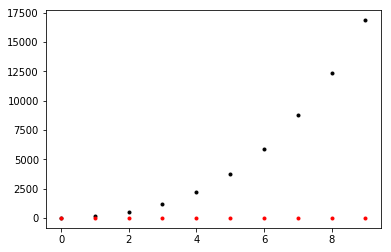

In [13]:
pl.clf()
x = np.arange(10)
res = exper_analysis_mult(22)
y1 = np.array(res[0])
h1 = np.array(res[1])

pl.plot(x, y1, 'k.', h1, 'r.')


Grafica completo

In [14]:
#pl.figure(1)
#x = np.arange(10)
#res = exper_analysis_mult(22)
#y1 = np.array(res[0])
#h1 = np.array(res[1])
#y2 = np.array(res[2])
#h2 = np.array(res[3])
#y3 = np.array(res[4])
#h3 = np.array(res[5])

#pl.subplot(211)
#pl.plot(x, y1, 'k.', y2, 'r.',y3, 'r.')

#pl.subplot(212)
#pl.plot(x, h1, 'k.', h2, 'r.'h3, 'r.')